In [209]:
#import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.optimize as opt

In [203]:
data = pd.read_csv('ex2data1.txt', header = None)
X = data.iloc[:,0:2]
y = data.iloc[:,2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


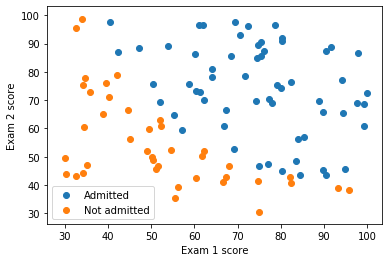

In [204]:
#Find the indicies of positive and negative examples

positive = y == 1
negative = y == 0

# Alternative Method to find positive and negative examples

# pos = where(y == 1)
# neg = where(y == 0)

#To get admitted mark column 0 and column 1 in X data 
admitted = plt.scatter(X[positive][0].values, X[positive][1].values)

#get not admitted matk from column 0 and column 1 in X data
not_admitted = plt.scatter(X[negative][0].values, X[negative][1].values)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend((admitted, not_admitted), ('Admitted', 'Not admitted'))
plt.show()

#### Sigmoid Function

Before Calculate Cost Function, recall the logistic regression hypothesis is defined as, h0(x) = g(0T*x)

where g is sigmoid function. It is defined as,

g = 1./(1+exp(-z));

In [205]:
# vectorized Sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

#### CostFunction Octave Code

Prediction = sigmoid(X*theta);

J = (1 / m) * sum( -y'*log(Prediction) - (1-y)'*log( 1 - Prediction) );

grad = (1/m) * (sum((X .* (Prediction - y)))');

#### The @ (at) operator is intended to be used for matrix multiplication.
https://docs.python.org/3.5/reference/simple_stmts.html#augmented-assignment-statements


In [206]:

def costFunction(X, y, theta):
    
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    
    return J

#### Gradient Function 

gradient looks identical to the linear regression gra-
dient, the formula is actually different because linear and logistic regression
have different definitions of h0(x).

grad = (1/m) * (sum((X .* (Prediction - y)))');

In [207]:
def gradient(X, y, theta):
    
    return ((1/m) * X.T * (sigmoid(X * theta) - y))

In [208]:
(m, n) = X.shape

interceptor = np.ones((m,1))

X = np.c_[interceptor , X]

y = y[:,np.newaxis]

theta = np.zeros((n+1,1))

J = costFunction(X, y, theta)

print('Cost function value :',J)


Cost function value : 0.6931471805599453


In Linear regression, we found the optimal value of theta by implementing gradient descent algorithm. Here we are going to use the fmin_tnc function from scipy.

#### Octave fminunc Function

##### Set options for fminunc\
options = optimset('GradObj', 'on', 'MaxIter', 400);\

##### Run fminunc to obtain the optimal theta\
##### This function will return theta and the cost\
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial theta, options);